In [1]:
import tensorflow as tf
import warnings
import keras
from keras import datasets, layers, Sequential
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
warnings.filterwarnings('ignore')

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
print(len(X_train))

50000


In [6]:
print(len(X_test))

10000


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def show(index):
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(X_train[index])
    plt.title(classes[y_train[index][0]])

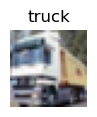

In [11]:
show(1)

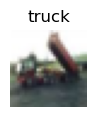

In [12]:
show(2)

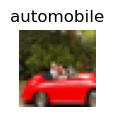

In [13]:
show(99)

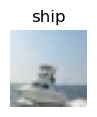

In [14]:
show(100)

In [15]:
model = Sequential([
    layers.Flatten(input_shape=(32,32,3,)),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)



Epoch 1/20


1563/1563 [==============================] - 14s 8ms/step - loss: 1.8600 - accuracy: 0.3286
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6731 - accuracy: 0.3990
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5965 - accuracy: 0.4272
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5504 - accuracy: 0.4438
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5182 - accuracy: 0.4596
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4876 - accuracy: 0.4721
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4645 - accuracy: 0.4782
Epoch 8/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4482 - accuracy: 0.4837
Epoch 9/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4234 - accuracy: 0.4934
Epoch 10/20
1563/1563 [==============================] - 13s 8ms/step

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4366 - accuracy: 0.4919


[1.4365566968917847, 0.4918999969959259]

In [17]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
def predictions(index):
    y = classes[y_test[index][0]]
    y_ = classes[np.argmax(y_pred[index])]
    print("Y TRUE = ", y)
    print("Y PRED = ", y_)
    if(y != y_):
        print("TRUE")
    else:
        print("FALSE")
    print()

In [19]:
for i in range(10):
    predictions(random.randint(0, 10000))

Y TRUE =  bird
Y PRED =  airplane
TRUE

Y TRUE =  automobile
Y PRED =  automobile
FALSE

Y TRUE =  ship
Y PRED =  ship
FALSE

Y TRUE =  dog
Y PRED =  dog
FALSE

Y TRUE =  airplane
Y PRED =  airplane
FALSE

Y TRUE =  horse
Y PRED =  deer
TRUE

Y TRUE =  ship
Y PRED =  ship
FALSE

Y TRUE =  cat
Y PRED =  deer
TRUE

Y TRUE =  truck
Y PRED =  truck
FALSE

Y TRUE =  truck
Y PRED =  truck
FALSE



In [20]:
y_ = [np.argmax(val) for val in y_pred]

In [21]:
cm = confusion_matrix(y_test, y_)

In [22]:
cm

array([[469,  24,  55,  26,  38,  26,  25,  38, 237,  62],
       [ 27, 486,   5,  26,  15,  25,  16,  22, 165, 213],
       [ 50,  17, 289,  77, 194,  83, 126,  94,  40,  30],
       [ 13,  10,  66, 312,  71, 178, 160,  69,  47,  74],
       [ 31,   5,  83,  56, 466,  42, 120, 127,  47,  23],
       [ 12,   7,  63, 199,  72, 370,  95, 100,  44,  38],
       [  4,   7,  37,  78, 156,  47, 586,  34,  18,  33],
       [ 24,   6,  43,  69,  89,  54,  38, 569,  32,  76],
       [ 55,  29,   9,  20,  22,  24,  11,  14, 752,  64],
       [ 32,  99,   9,  27,   8,  24,  19,  34, 128, 620]], dtype=int64)

Text(45.722222222222214, 0.5, 'TRUTH')

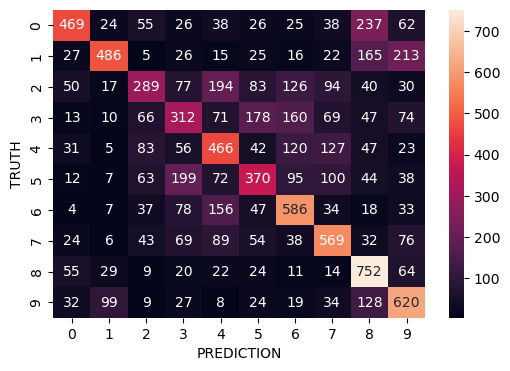

In [23]:
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='')
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")